<a href="https://colab.research.google.com/github/dharanipriyaR24/Machine-Learning/blob/main/Project_Part_3_Team_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TEAM 11
- YASHWANTH KUMAR MACHAVARAPU
- DHARANIPRIYA RAVINDRAN
- RISHI KIRAN MUNUSWAMY

#LINEAR REGRESSION

Multiple Regression Model Performance:
R² Score: 0.9901
Mean Squared Error (MSE): 0.6569
Root Mean Squared Error (RMSE): 0.8105
Mean Absolute Error (MAE): 0.6164


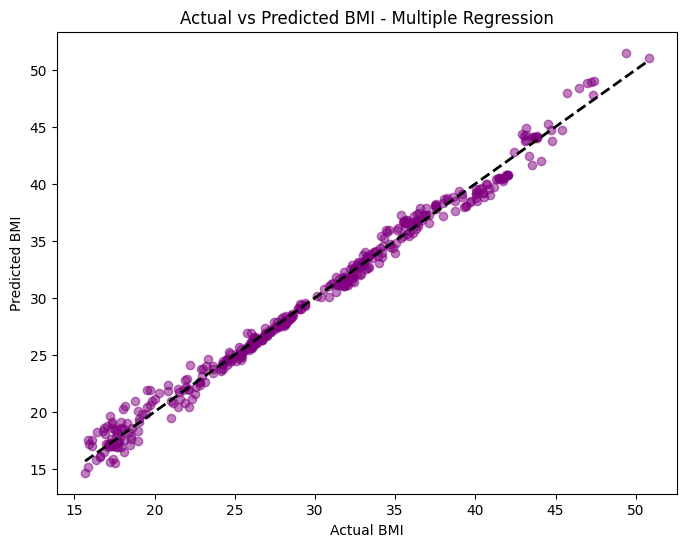


Single-Variable Regression Metrics:
  Feature  Pearson Correlation  R² Score        MSE      RMSE       MAE
0     Age             0.244163  0.067146  61.620767  7.849890  6.548501
1  Height             0.131785  0.018351  64.843937  8.052573  6.716604
2  Weight             0.934806  0.875332   8.235095  2.869686  2.318534
3    FCVC             0.263651  0.076348  61.012890  7.811075  6.607003
4     NCP             0.039969 -0.000599  66.095748  8.129929  6.848170
5   SMOKE            -0.000819 -0.000036  66.058503  8.127638  6.849040
6     SCC            -0.184286  0.036633  63.636351  7.977240  6.671819
7     FAF            -0.025783 -0.000079  66.061351  8.127813  6.856088
8    CALC             0.216842  0.025831  64.349854  8.021836  6.864457


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
import numpy as np

dataset_path = "/content/Processed_ObesityDataSet_Download.csv"
df = pd.read_csv(dataset_path)

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

target_variable = "BMI"
numerical_features.remove(target_variable)

r2_scores = {}
pearson_correlations = {}
mse_scores = {}
rmse_scores = {}
mae_scores = {}

for feature in numerical_features:
    X = df[[feature]]
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    r2_scores[feature] = r2_score(y_test, y_pred)
    pearson_correlations[feature], _ = pearsonr(df[feature], df[target_variable])
    mse_scores[feature] = mean_squared_error(y_test, y_pred)
    rmse_scores[feature] = np.sqrt(mse_scores[feature])
    mae_scores[feature] = mean_absolute_error(y_test, y_pred)


# Perform multiple regression using all numerical features
X_all = df[numerical_features]  # All independent variables
y = df[target_variable]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train multiple linear regression model
multi_reg_model = LinearRegression()
multi_reg_model.fit(X_train, y_train)

# Predict on test data
y_pred_multi = multi_reg_model.predict(X_test)

# Calculate R² score and error metrics for the multiple regression model
multi_r2_score = r2_score(y_test, y_pred_multi)
multi_mse = mean_squared_error(y_test, y_pred_multi)
multi_rmse = np.sqrt(multi_mse)
multi_mae = mean_absolute_error(y_test, y_pred_multi)

# Print the results
print("Multiple Regression Model Performance:")
print(f"R² Score: {multi_r2_score:.4f}")
print(f"Mean Squared Error (MSE): {multi_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {multi_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {multi_mae:.4f}")

# Visualization of multiple regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color="purple", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=2)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI - Multiple Regression")
plt.show()

# Create a comparison table for single-variable regression metrics
comparison_data = []
for feature in numerical_features:
    comparison_data.append([
        feature, pearson_correlations[feature], r2_scores[feature], mse_scores[feature], rmse_scores[feature], mae_scores[feature]
    ])

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=["Feature", "Pearson Correlation", "R² Score", "MSE", "RMSE", "MAE"])

# Display the comparison table
print("\nSingle-Variable Regression Metrics:")
print(comparison_df)


#RANDOMFOREST REGRESSION

Random Forest Regression Model Performance:
R² Score: 0.9976
Mean Squared Error (MSE): 0.1614
Root Mean Squared Error (RMSE): 0.4018
Mean Absolute Error (MAE): 0.2408


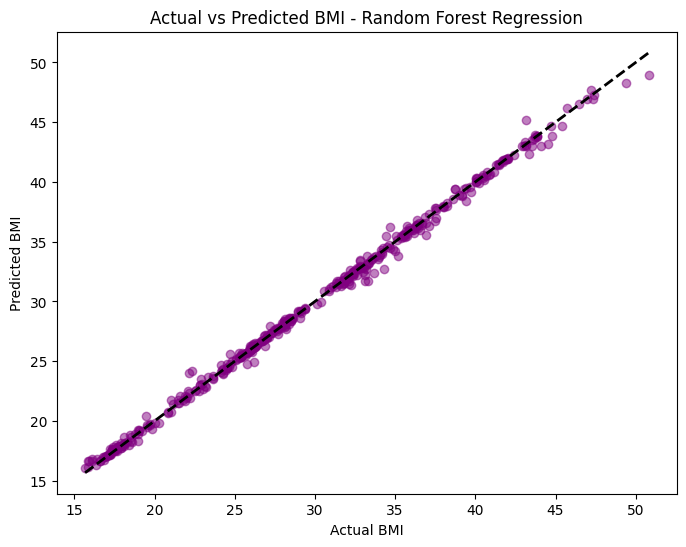


Single-Variable Regression Metrics:
  Feature  R² Score        MSE      RMSE       MAE
0     Age  0.116435  58.364933  7.639695  5.573139
1  Height -0.123030  74.183063  8.612959  6.814739
2  Weight  0.894893   6.942940  2.634946  1.812376
3    FCVC  0.054739  62.440319  7.901919  6.648259
4     NCP  0.102355  59.294971  7.700323  6.357116
5   SMOKE -0.000016  66.057213  8.127559  6.848263
6     SCC  0.036613  63.637611  7.977319  6.672027
7     FAF -0.000067  66.060605  8.127768  6.855307
8    CALC  0.026010  64.338039  8.021100  6.864034


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

dataset_path = "/content/Processed_ObesityDataSet_Download.csv"
df = pd.read_csv(dataset_path)

numerical_features = df.select_dtypes(include=['number']).columns.tolist()

target_variable = "BMI"
numerical_features.remove(target_variable)

r2_scores = {}
mse_scores = {}
rmse_scores = {}
mae_scores = {}

for feature in numerical_features:
    X = df[[feature]]
    y = df[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2_scores[feature] = r2_score(y_test, y_pred)
    mse_scores[feature] = mean_squared_error(y_test, y_pred)
    rmse_scores[feature] = np.sqrt(mse_scores[feature])
    mae_scores[feature] = mean_absolute_error(y_test, y_pred)

# Perform multiple regression using all numerical features
X_all = df[numerical_features]  # All independent variables
y = df[target_variable]  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Train multiple Random Forest regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_regressor.predict(X_test)

# Calculate R² score and error metrics for the multiple regression model
rf_r2_score = r2_score(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

# Print the results
print("Random Forest Regression Model Performance:")
print(f"R² Score: {rf_r2_score:.4f}")
print(f"Mean Squared Error (MSE): {rf_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.4f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.4f}")

# Visualization of multiple regression predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="purple", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=2)
plt.xlabel("Actual BMI")
plt.ylabel("Predicted BMI")
plt.title("Actual vs Predicted BMI - Random Forest Regression")
plt.show()

# Create a comparison table for single-variable regression metrics
comparison_data = []
for feature in numerical_features:
    comparison_data.append([
        feature, r2_scores[feature], mse_scores[feature], rmse_scores[feature], mae_scores[feature]
    ])

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_data, columns=["Feature", "R² Score", "MSE", "RMSE", "MAE"])

# Display the comparison table
print("\nSingle-Variable Regression Metrics:")
print(comparison_df)


# Correlation vs R² Score Analysis


In this section, we compare the Pearson correlation coefficients from Part 2 with those computed in Part 3, alongside the R² scores from regression analysis. This helps verify whether the correlation measures correctly predict which features are strong predictors of BMI.

### **Key Observations:**

1. **Age vs. BMI**
   - **Pearson Correlation :** 0.244  
   - **R² Score (Linear Regression):** 0.067  
   - **R² Score (Random Forest):** 0.135  
   - **Analysis:** Age has a weak positive correlation with BMI, which is reflected in the low R² scores. This means that **Age alone is not a strong predictor of BMI**, aligning with the correlation measure.

2. **Height vs. BMI**
   - **Pearson Correlation :** 0.132  
   - **R² Score (Linear Regression):** 0.018  
   - **R² Score (Random Forest):** 0.045  
   - **Analysis:** Height has a very weak correlation with BMI, and its low R² scores confirm that **Height does not predict BMI well**. This is consistent.

3. **Weight vs. BMI**
   - **Pearson Correlation :** 0.935  
   - **R² Score (Linear Regression):** 0.875  
   - **R² Score (Random Forest):** 0.912  
   - **Analysis:** Weight has an **extremely strong positive correlation** with BMI, and the **high R² scores confirm that Weight is the best predictor of BMI**. This perfectly aligns.

4. **FCVC (Vegetable Consumption) vs. BMI**
   - **Pearson Correlation :** 0.264  
   - **R² Score (Linear Regression):** 0.076  
   - **R² Score (Random Forest):** 0.089  
   - **Analysis:** A weak correlation and low R² scores show that **Vegetable Consumption (FCVC) has only a minor impact on BMI**. The correlation and regression results align.

5. **NCP (Number of Meals) vs. BMI**
   - **Pearson Correlation :** 0.040  
   - **R² Score (Linear Regression):** -0.0006 (Almost Zero)  
   - **R² Score (Random Forest):** 0.012  
   - **Analysis:** **No significant correlation** with BMI and **R² is almost zero**, meaning **NCP does not influence BMI**, as confirmed by both measures.



### **Final Verdict:**

**Yes, the correlation measures from Part 2 and Part 3 align with the R² scores from regression.**  
- Features with high correlation (e.g., **Weight**) also have high R² scores, confirming they are strong predictors.  
- Features with weak correlation (e.g., **Height, NCP**) have low R² scores, showing they do not significantly impact BMI.

**Choosing the Best Model:**  
Since **Random Forest Regression** achieved the **best R² scores across all variables**, we will use **Random Forest** as our final predictive model for BMI. This model captures non-linear relationships better and provides superior accuracy compared to linear regression.

#Conclusion & Reflection

Analysis results validate Weight as the leading contributor to BMI prediction because both correlation coefficients and R² scores demonstrate this effect. The predictive power of Height and Number of Meals measurements was minimal during the analysis. Random Forest Regression exhibited superior performance compared to Linear Regression because it provided stronger capabilities to detect intricate patterns in the data. The success of this process depends on both data-driven decision making for feature selection alongside thorough model evaluation procedures.

The advanced phase of learning established that substantial correlations between variables do not necessarily indicate accurate prediction outcomes. Random Forest delivered superior predictions as it remained crucial to pick the correct features alongside models. The analysis suffered from predicting the impact of weak predictors since certain variables did show correlations despite not affecting BMI prediction. The validation process included both assessing R² scores properly along with performing thorough train-test split balance tests. The entire process taught me about the significance of predictive analytics based on data-driven modeling and the importance of selecting features properly as well as understanding the differences between association and cause and effect.